# Imports

In [1]:
from importlib import reload
import functions as f

# for data handling
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

In [2]:
# General

from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,stratify=y)
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [3]:
# Regression

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
# Ridge(alpha=a, normalize=True)
from sklearn.linear_model import Lasso
# Lasso(alpha = alpha[i], normalize=True, max_iter = 1000000)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [4]:
# Classification

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
# tree_clf = DecisionTreeClassifier(max_depth = 3)
# fig = tree_clf.fit(X, y)
# tree.plot_tree(fig,filled = True)
# plt.show()
# tree_clf.predict_proba(X)
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

from sklearn.svm import LinearSVC # LinearSVC(C=1, loss="hinge")
from sklearn.svm import SVC

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.neighbors import KNeighborsClassifier
# neigh = KNeighborsClassifier(n_neighbors=5)
# neigh.fit(X,y)

In [5]:
# Unsupervised learning

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

from sklearn.decomposition import PCA
# pca = PCA(n_components=10)
# pca.explained_variance_ratio_
# plt.matshow(pca_pipe['pca'].components_, cmap = 'plasma')

from sklearn.manifold import MDS
# mds = MDS(n_components = 2)
# X_mds = mds.fit_transform(X)

from sklearn.manifold import LocallyLinearEmbedding
# lle = LocallyLinearEmbedding(n_neighbors=100, n_components=2, method='modified', eigen_solver='dense')
# X_lle = lle.fit_transform(X)

from sklearn.manifold import Isomap
# iso = Isomap(n_neighbors=160, n_components=2)
# X_iso = iso.fit_transform(X)

from sklearn.manifold import TSNE
# tsne = TSNE(n_components = 2, perplexity=50)
# X_tsne = tsne.fit_transform(X)

In [7]:
# For reloading our functions library if anything is changed
f = reload(f)

# Work

## Importing Data

In [45]:
df = pd.read_csv('Nicks_magnus_nihal.csv')
df_copy = df.copy()
X = df_copy.drop(columns = ['game_id','white_player'])
y = df_copy['white_player']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,stratify=y)
X_train.head()

wn_pair  wn_outpost  wn_repositioning  wn_mobility  wb_pair  \
217        0    0.084746          0.222485     2.423729        0   
530        0    0.000000          0.000000     2.777778        0   
159        0    0.000000          0.137719     1.944444        0   
82         0    0.000000          0.040674     2.750000        0   
576        0    0.000000          0.067510     2.300000        0   

     wk_side_fianchetto  wq_side_fianchetto  wb_mobility  \
217                   0                   0     0.932203   
530                   0                   0     3.370370   
159                   1                   1     1.388889   
82                    1                   1     1.312500   
576                   0                   0     3.725000   

     wlong_diagonal_control  wopposite_color_b  ...  num_direct_trades  \
217                0.000000                 -1  ...                  4   
530                0.000000                 -1  ...                  3   
159                0.555556                  1  ...                  6   
82                 0.916667                  0  ...                  3   
576                0.000000                 -1  ...                  6   

     num_indirect_trades  num_direct_trades_white  num_indirect_trades_white  \
217                    0                        1                          0   
530                    0                        2                          0   
159                    0                        5                          0   
82                     0                        1                          0   
576                    1                        2                          0   

     avg_time_between_direct_trade  exchanges_possible  king_squares_attacked  \
217                            1.0            0.255814               0.881356   
530                            1.0            0.318182               1.074074   
159                            1.0            0.850000               0.388889   
82                             1.0            0.518519               0.375000   
576                            1.0            0.363636               0.500000   

     king_moves  king_moves_weighted  distance_from_king  
217           5                  147            3.095796  
530           6                  201            3.303809  
159           0                    0            3.399539  
82            0                    0            3.325820  
576           0                    0            3.453367  

[5 rows x 93 columns]

In [32]:
y_train.head()

961     Nihal
259    Magnus
358    Magnus
150    Magnus
190    Magnus
Name: white_player, dtype: object

## Dimensionality reduction

### PCA

In [118]:
n = 50
pca_pipe = Pipeline([('scale',StandardScaler()), ('pca',PCA(n_components = n))])
X_train_pipe = pca_pipe.fit_transform(X_train,y_train)

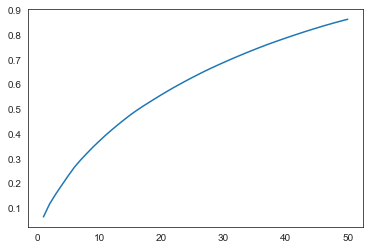

In [119]:
plt.plot(np.arange(1,n+1),np.cumsum(pca_pipe['pca'].explained_variance_ratio_))

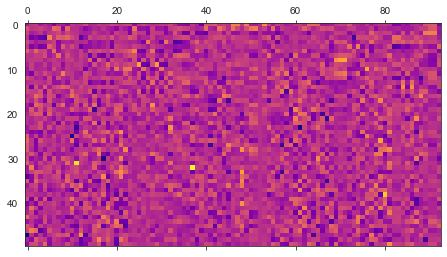

In [120]:
plt.matshow(pca_pipe['pca'].components_, cmap = 'plasma')
plt.show()

## Classification

### Nearest Neighbors

In [137]:
neigh_pipe = Pipeline([('scaler',StandardScaler()),('neigh',KNeighborsClassifier(n_neighbors = 9))])
neigh_pipe.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('neigh',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=9, p=2,
                                      weights='uniform'))],
         verbose=False)

In [138]:
pred = neigh_pipe.predict(X_test)

In [139]:
sum(pred==y_test)/len(y_test)

0.6700507614213198

### Decision Tree

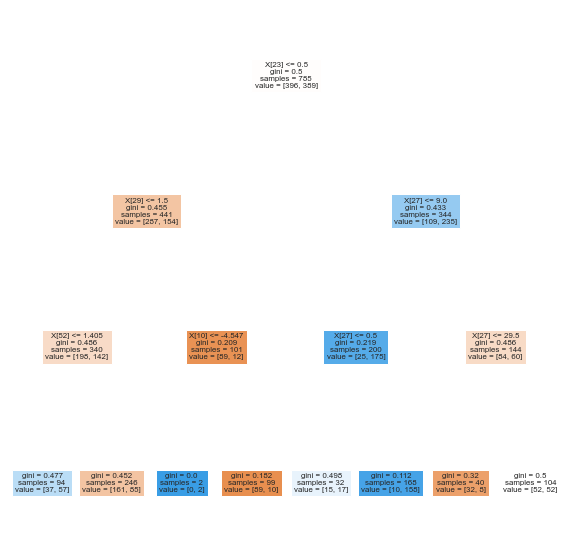

In [157]:
tree_clf = DecisionTreeClassifier(max_depth = 3)
fig, ax = plt.subplots(figsize=(10, 10))
fig = tree_clf.fit(X_train, y_train)
tree.plot_tree(fig,filled = True,ax=ax)
plt.show()

In [158]:
pred = tree_clf.predict(X_test)
sum(pred==y_test)/len(y_test)

0.7055837563451777

In [160]:
X_colns = X.columns

In [162]:
i=23
print(i,X_colns[i])
i=29
print(i,X_colns[i])
i=27
print(i,X_colns[i])
i=52
print(i,X_colns[i])
i=10
print(i,X_colns[i])
i=27
print(i,X_colns[i])
i=27
print(i,X_colns[i])

23 A
29 C#
27 A#
52 wb_rank
10 b_p_coherency
27 A#
27 A#


So the decision tree is finding that the opening is pretty important for prediction

### Custom: by opening

For each opening type (A,B,C,D,E) I'll classify it as Magnus or Nihal (based on who did that opening the most often). Then check how predictive that is.

In [184]:
magnus_openings = [0,0,0,0,0]
magnus_train = X_train.loc[y_train == 'Magnus']
magnus_openings[0] = sum(magnus_train['A'] == 1) / len(magnus_train)
magnus_openings[1] = sum(magnus_train['B'] == 1) / len(magnus_train)
magnus_openings[2] = sum(magnus_train['C'] == 1) / len(magnus_train)
magnus_openings[3] = sum(magnus_train['D'] == 1) / len(magnus_train)
magnus_openings[4] = 1 - sum(magnus_openings)
magnus_openings

[0.27525252525252525,
 0.20202020202020202,
 0.23232323232323232,
 0.18686868686868688,
 0.10353535353535359]

In [185]:
nihal_openings = [0,0,0,0,0]
nihal_train = X_train.loc[y_train == 'Nihal']
nihal_openings[0] = sum(nihal_train['A'] == 1) / len(nihal_train)
nihal_openings[1] = sum(nihal_train['B'] == 1) / len(nihal_train)
nihal_openings[2] = sum(nihal_train['C'] == 1) / len(nihal_train)
nihal_openings[3] = sum(nihal_train['D'] == 1) / len(nihal_train)
nihal_openings[4] = 1 - sum(nihal_openings)
nihal_openings

[0.6041131105398457,
 0.07455012853470437,
 0.038560411311053984,
 0.1953727506426735,
 0.08740359897172234]

In [186]:
opening_pred = ['','','','','']
for i in range(5):
    if magnus_openings[i] > nihal_openings[i]:
        opening_pred[i] = 'Magnus'
    else:
        opening_pred[i] = 'Nihal'
opening_pred

['Nihal', 'Magnus', 'Magnus', 'Nihal', 'Magnus']

In [210]:
pred = y_test.copy()
for i in range(len(X_test)):
    openings = list(X_test[['A','B','C','D']].iloc[i])
    openings.append(1-sum(openings))
    opening_index = np.argmax(openings)
    pred.iloc[i] = opening_pred[opening_index]

In [211]:
pred

1277    Magnus
8        Nihal
1840     Nihal
1565     Nihal
743     Magnus
         ...  
1285     Nihal
1297     Nihal
1969    Magnus
1766     Nihal
24      Magnus
Name: white_player, Length: 197, dtype: object

In [213]:
sum(pred==y_test)/len(y_test)

0.700507614213198

In [219]:
import sklearn

guesses = pred
actual = y_test

labels = ['Magnus','Nihal']

c_matrix = np.round(sklearn.metrics.confusion_matrix(actual,guesses,labels = labels) / len(y_test),2)

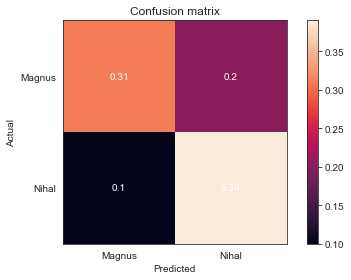

In [220]:
fig, ax = plt.subplots()
im = ax.imshow(c_matrix)

# We want to show all ticks...
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
# ... and label them with the respective list entries
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

# Axes labels
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Loop over data dimensions and create text annotations.
for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(j, i, c_matrix[i, j],
                       ha="center", va="center", color="w")

fig.colorbar(im)
        
ax.set_title("Confusion matrix")
fig.tight_layout()
plt.show()

# Stratifying by opening

Given how well the opening predicted the player, let's try improving that by training data of a single classifier on each separate opening.

Matt said it's better not to do this I think, bc we wanna limit the number of separate classifiers we train. But fuck it, let's see if it works first.

Need to
- See how many of each type of opening there are, i.e. do we have enough data to stratify
- Try it on one opening first, and compare with the naive prediction from the pure-opening classifier

Maybe with train_test_split we can do this stratifying at the start

In [57]:
letters = ['A','B','C','D','E']
stratified = [df_copy[df_copy[letter] == 1] for letter in letters]

In [58]:
[len(letter_data) for letter_data in stratified]

[427, 139, 135, 183, 98]

In [59]:
len(df_copy)

982

In [61]:
[[len(letter_data[letter_data['white_player'] == 'Magnus']),len(letter_data[letter_data['white_player'] == 'Nihal'])] for letter_data in stratified]

[[136, 291], [103, 36], [115, 20], [86, 97], [56, 42]]

Ok so it makes the most sense to train it on the 'A' data as a pilot.

Really, we'd need to get waaay more data (ideally say x50, but x10 could be enough)

In [62]:
A_df = stratified[0]
A_df.head()

game_id white_player  wn_pair  wn_outpost  \
3  https://lichess.org/ONXJpzDf       Magnus        0    0.000000   
4  https://lichess.org/RHs2d7J1       Magnus        0    0.381818   
5  https://lichess.org/gM99X9t5       Magnus        0    0.000000   
7  https://lichess.org/J0rTKwGV       Magnus        0    0.017241   
9  https://lichess.org/bgnqYnca       Magnus        0    0.000000   

   wn_repositioning  wn_mobility  wb_pair  wk_side_fianchetto  \
3          0.005523     0.000000        1                   0   
4          0.105536     3.409091        0                   0   
5          0.000000     0.000000        1                   0   
7          0.081220     2.775862        0                   0   
9          0.108606     2.166667        1                   0   

   wq_side_fianchetto  wb_mobility  ...  num_direct_trades  \
3                   0     3.942308  ...                  7   
4                   1     2.709091  ...                  2   
5                   1     3.717391  ...                  7   
7                   1     3.905172  ...                  5   
9                   1     3.000000  ...                  5   

   num_indirect_trades  num_direct_trades_white  num_indirect_trades_white  \
3                    0                        5                          0   
4                    0                        0                          0   
5                    0                        3                          0   
7                    0                        2                          0   
9                    1                        2                          1   

   avg_time_between_direct_trade  exchanges_possible  king_squares_attacked  \
3                            1.0            0.413793               0.692308   
4                            1.0            0.589744               2.527273   
5                            1.0            0.440000               1.347826   
7                            1.0            0.357143               1.189655   
9                            1.0            0.807692               1.066667   

   king_moves  king_moves_weighted  distance_from_king  
3           0                    0            3.063398  
4           3                   97            3.032988  
5           0                    0            3.390818  
7           1                   26            3.134654  
9           1                   34            3.187583  

[5 rows x 95 columns]

In [78]:
# The opening columns give us no info, remove all but A#
X_A = A_df.drop(columns = ['game_id','white_player','A','B','C','D','E','B#','C#','D#','E#'])
y_A = A_df['white_player']
X_A_train, X_A_test, y_A_train, y_A_test = train_test_split(X_A,y_A,test_size = 0.2,stratify=y_A)

In [79]:
len(X_A_train)

341

Ok, this is an okay amount of training data for now

Let's try some stufffff.....

### PCA

In [81]:
n = 50
pca_pipe = Pipeline([('scale',StandardScaler()), ('pca',PCA(n_components = n))])
X_A_train_pipe = pca_pipe.fit_transform(X_A_train,y_A_train)

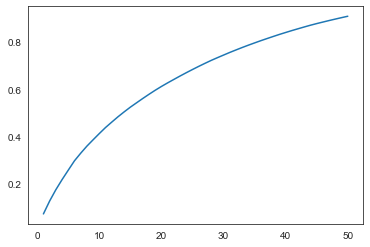

In [82]:
plt.plot(np.arange(1,n+1),np.cumsum(pca_pipe['pca'].explained_variance_ratio_))

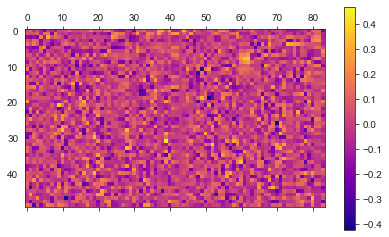

In [83]:
plt.matshow(pca_pipe['pca'].components_, cmap = 'plasma')
plt.colorbar()
plt.show()

Ok it's having a bad time. But the clump of yellow suggests some features:

In [85]:
X_A.columns[60:63]

Index(['discovered_checks_set_up', 'discovered_checks_given',
       'discovered_checks_chances'],
      dtype='object')

### K nearest neighbors

In [95]:
neigh_pipe = Pipeline([('scaler',StandardScaler()),('neigh',KNeighborsClassifier(n_neighbors = 5))])
neigh_pipe.fit(X_A_train,y_A_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('neigh',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=False)

In [96]:
pred = neigh_pipe.predict(X_A_test)
sum(pred==y_A_test)/len(y_A_test)

0.6744186046511628

Lol this isn't great accuracy, but it is nearest neighbors so it's not like its doing anything smart

### Decision tree

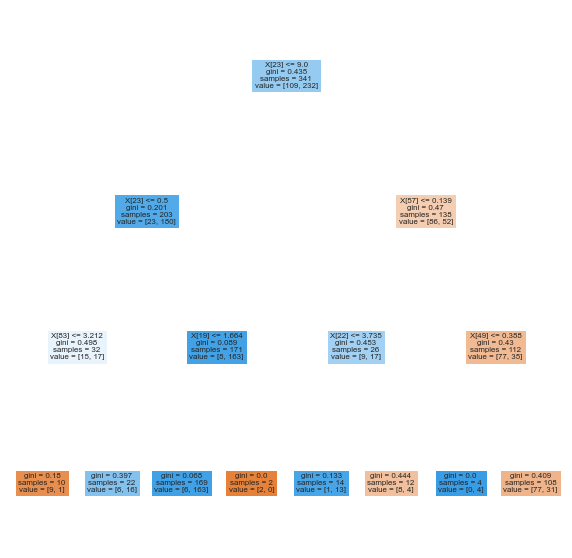

In [97]:
tree_clf = DecisionTreeClassifier(max_depth = 3)
fig, ax = plt.subplots(figsize=(10, 10))
fig = tree_clf.fit(X_A_train, y_A_train)
tree.plot_tree(fig,filled = True,ax=ax)
plt.show()

In [99]:
[X_A.columns[i] for i in [23,57,53,19,22,49]]

['A#', 'wcl_BL', 'wcl_ML', 'wq_aggression', 'wq_mobility', 'wb_minor_pref']

In [100]:
pred = tree_clf.predict(X_A_test)
sum(pred==y_A_test)/len(y_A_test)

0.7093023255813954

Still can't get past that 70% accuracy

In [106]:
A_num_magnus = X_A[y_A == 'Magnus']['A#']
A_num_nihal = X_A[y_A == 'Nihal']['A#']

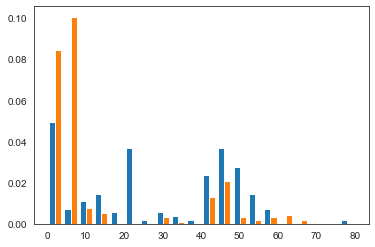

In [115]:
plt.hist([A_num_magnus,A_num_nihal],bins = 20, density = True)
plt.show()

There definitely is a difference in the A# values

Worth noting that in the A openings, 136 were Magnus and 291 were Nihal

In [116]:
291/(136+291)

0.6814988290398126

So just naively predicting Nihal gets us about 70%...so ideally we'd want the classifier to get 80% or higher

It would be smart to have a classifier that returns probabilities of Magnus/Nihal, so that when you analyze a handful of games you can make some nice formula that maximizes likelihood over the set of games.

i.e. n games, 70% chance each is Magnus, then 0.7^n chance the player is Magnus but 0.3^n chance the player is Nihal, so we'll go with Magnus?... Or maybe something with Bayes' theorem

### Random forest

In [120]:
forest_clf = RandomForestClassifier(max_depth = 4)
forest_clf.fit(X_A_train,y_A_train)
pred = forest_clf.predict(X_A_test)
sum(pred == y_A_test)/len(y_A_test)

0.686046511627907

In [122]:
names = []
scores = []
for name, score in zip(X_A_train.columns,forest_clf.feature_importances_):
    names.append(name)
    scores.append(np.round(score,4))
    
score_df = pd.DataFrame({'feature':names,'importance_score':scores})

score_df = score_df.sort_values('importance_score',ascending=False)

In [123]:
score_df.head(20)

feature  importance_score
23                  A#            0.1246
5   wk_side_fianchetto            0.0515
47           wb_attack            0.0367
22         wq_mobility            0.0358
55              wcl_MR            0.0337
12   wn_b_develop_pref            0.0335
46          wb_density            0.0323
34         wp_backward            0.0248
31  wp_center_strength            0.0242
57              wcl_BL            0.0241
79  exchanges_possible            0.0233
25        wc_earliness            0.0230
63             P_moves            0.0193
24  w_development_side            0.0183
19       wq_aggression            0.0166
69          pins_given            0.0159
67             Q_moves            0.0159
44             wb_rank            0.0157
48        wb_pawn_pref            0.0157
3          wn_mobility            0.0153

So again this notes that A# is pretty important

The decision tree liked ['A#', 'wcl_BL', 'wcl_ML', 'wq_aggression', 'wq_mobility', 'wb_minor_pref']

Some similarities, namely wq_mobility is up there in both

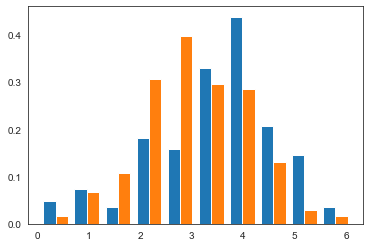

In [124]:
wq_mobility_num_magnus = X_A[y_A == 'Magnus']['wq_mobility']
wq_mobility_num_nihal = X_A[y_A == 'Nihal']['wq_mobility']
plt.hist([wq_mobility_num_magnus,wq_mobility_num_nihal], density = True)
plt.show()

And yep, in fact there is a bit of a difference! Not much, but it is noting that they do have different queen mobility preferences

### Let's try SVC

In [133]:
svc_pipe = Pipeline([('scaler', StandardScaler()),('svc', SVC(kernel = "rbf", C=1))])
svc_pipe.fit(X_A_train,y_A_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [134]:
pred = svc_pipe.predict(X_A_test)
sum(pred == y_A_test)/len(y_A_test)

0.6511627906976745

What the fuuuuuckkkkk

## Unsupervised stuff

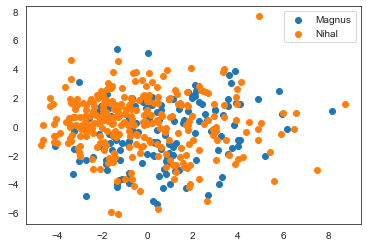

In [143]:
pca_pipe = Pipeline([('scaler',StandardScaler()),('pca',PCA(n_components = 2))])
transform = pca_pipe.fit_transform(X_A)

indices = y_A == 'Magnus'
plt.scatter(transform[indices][:,0],transform[indices][:,1],label='Magnus')
indices = y_A == 'Nihal'
plt.scatter(transform[indices][:,0],transform[indices][:,1],label='Nihal')
plt.legend()
plt.show()

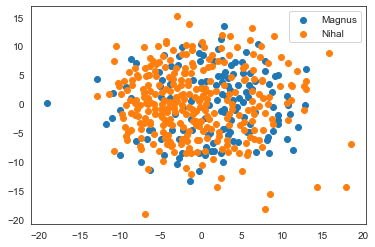

In [144]:
pipe = Pipeline([('scaler',StandardScaler()),('mds',MDS(n_components = 2))])
transform = pipe.fit_transform(X_A)

indices = y_A == 'Magnus'
plt.scatter(transform[indices][:,0],transform[indices][:,1],label='Magnus')
indices = y_A == 'Nihal'
plt.scatter(transform[indices][:,0],transform[indices][:,1],label='Nihal')
plt.legend()
plt.show()

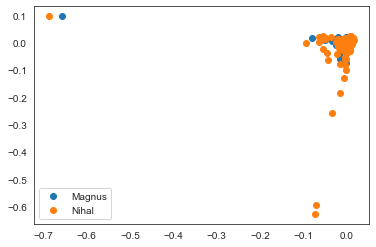

In [147]:
pipe = Pipeline([('scaler',StandardScaler()),
                 ('lle',LocallyLinearEmbedding(n_neighbors=100, n_components=2, method='modified', eigen_solver='dense'))])
transform = pipe.fit_transform(X_A)

indices = y_A == 'Magnus'
plt.scatter(transform[indices][:,0],transform[indices][:,1],label='Magnus')
indices = y_A == 'Nihal'
plt.scatter(transform[indices][:,0],transform[indices][:,1],label='Nihal')
plt.legend()
plt.show()

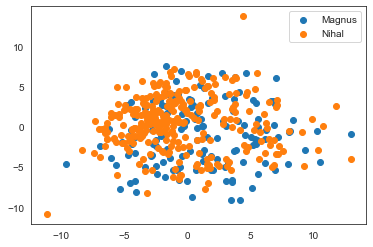

In [149]:
pipe = Pipeline([('scaler',StandardScaler()),
                 ('iso',Isomap(n_neighbors=50, n_components=2))])
transform = pipe.fit_transform(X_A)

indices = y_A == 'Magnus'
plt.scatter(transform[indices][:,0],transform[indices][:,1],label='Magnus')
indices = y_A == 'Nihal'
plt.scatter(transform[indices][:,0],transform[indices][:,1],label='Nihal')
plt.legend()
plt.show()

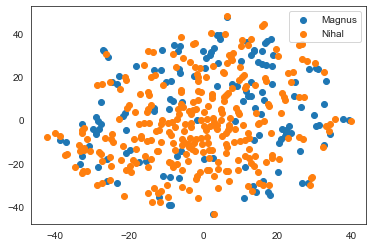

In [152]:
pipe = Pipeline([('scaler',StandardScaler()),
                 ('tsne',TSNE(n_components = 2, perplexity=10))])
transform = pipe.fit_transform(X_A)

indices = y_A == 'Magnus'
plt.scatter(transform[indices][:,0],transform[indices][:,1],label='Magnus')
indices = y_A == 'Nihal'
plt.scatter(transform[indices][:,0],transform[indices][:,1],label='Nihal')
plt.legend()
plt.show()

No luck really

# Different opening

Looking at A type openings probably wasn't the best idea

Let's try D openings (closed and semi closed)

Only 183 data points so this won't be great, but hopefully we can find something

For the future, did we do bullet games? Should do blitz maybe, bc that way we'll get more standard openings

In [161]:
D_df = stratified[3]
D_df.head()

game_id white_player  wn_pair  wn_outpost  \
0   https://lichess.org/1zhL4g8Y       Magnus        0        0.12   
2   https://lichess.org/Nd2A1c5E       Magnus        0        0.00   
8   https://lichess.org/ePPJ0Hwv       Magnus        0        0.00   
18  https://lichess.org/Dk6IEaBT       Magnus        0        0.00   
19  https://lichess.org/hHecpIns       Magnus        0        0.00   

    wn_repositioning  wn_mobility  wb_pair  wk_side_fianchetto  \
0           0.949448     2.580000        0                   0   
2           0.000000     3.777778        0                   0   
8           0.000000     1.942857        0                   0   
18          0.102324     2.500000        0                   1   
19          0.192275     2.041667        1                   0   

    wq_side_fianchetto  wb_mobility  ...  num_direct_trades  \
0                    0     4.120000  ...                  5   
2                    0     2.722222  ...                  6   
8                    0     3.428571  ...                  6   
18                   0     2.827586  ...                  6   
19                   0     3.750000  ...                  5   

    num_indirect_trades  num_direct_trades_white  num_indirect_trades_white  \
0                     0                        2                          0   
2                     0                        3                          0   
8                     1                        1                          0   
18                    1                        3                          1   
19                    0                        4                          0   

    avg_time_between_direct_trade  exchanges_possible  king_squares_attacked  \
0                             1.0            0.769231               0.000000   
2                             1.0            0.840000               0.444444   
8                             1.2            0.269231               0.914286   
18                            1.0            0.600000               0.655172   
19                            1.0            0.407407               0.916667   

    king_moves  king_moves_weighted  distance_from_king  
0            0                    0            3.316993  
2            1                   26            3.368854  
8            0                    0            3.199516  
18           0                    0            3.182913  
19           0                    0            3.515146  

[5 rows x 95 columns]

In [166]:
# The opening columns give us no info, remove all but D#
X_D = D_df.drop(columns = ['game_id','white_player','A','B','C','D','E','A#','B#','C#','E#'])
y_D = D_df['white_player']
X_D_train, X_D_test, y_D_train, y_D_test = train_test_split(X_D,y_D,test_size = 0.2,stratify=y_D)

In [167]:
len(X_D_train)

146

In [168]:
len(X_D)

183

From before we have that 86 of the games are Magnus and 97 are Nihal, so we'd have a naive accuracy of

In [169]:
97/183

0.5300546448087432

This should hopefully be easier to beat, lol

### PCA

In [170]:
n = 50
pca_pipe = Pipeline([('scale',StandardScaler()), ('pca',PCA(n_components = n))])
X_D_train_pipe = pca_pipe.fit_transform(X_D_train,y_D_train)

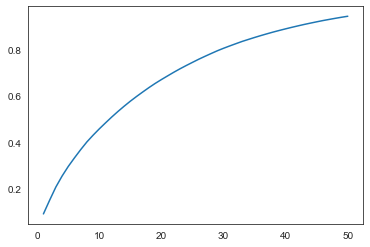

In [171]:
plt.plot(np.arange(1,n+1),np.cumsum(pca_pipe['pca'].explained_variance_ratio_))

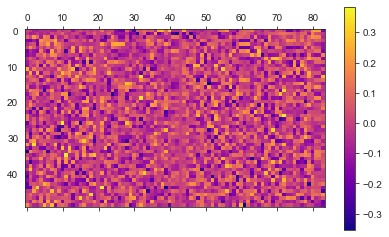

In [172]:
plt.matshow(pca_pipe['pca'].components_, cmap = 'plasma')
plt.colorbar()
plt.show()

### K nearest neighbors

In [173]:
neigh_pipe = Pipeline([('scaler',StandardScaler()),('neigh',KNeighborsClassifier(n_neighbors = 5))])
neigh_pipe.fit(X_D_train,y_D_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('neigh',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=False)

In [174]:
pred = neigh_pipe.predict(X_D_test)
sum(pred==y_D_test)/len(y_D_test)

0.5675675675675675

### Decision tree

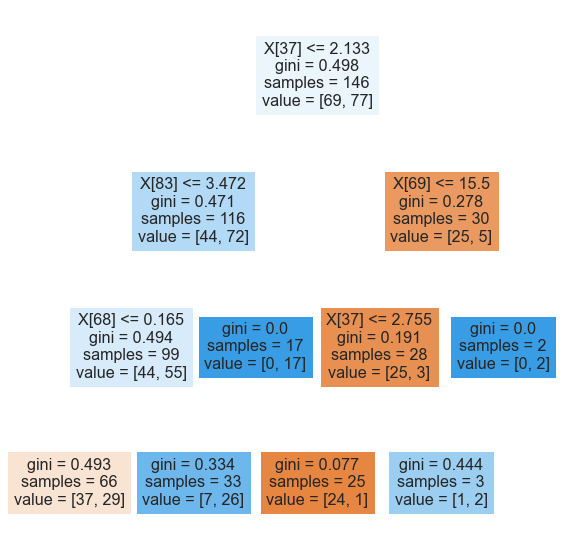

In [175]:
tree_clf = DecisionTreeClassifier(max_depth = 3)
fig, ax = plt.subplots(figsize=(10, 10))
fig = tree_clf.fit(X_D_train, y_D_train)
tree.plot_tree(fig,filled = True,ax=ax)
plt.show()

In [176]:
[X_D.columns[i] for i in [37,83,69,68,37]]

['wp_forwardness',
 'distance_from_king',
 'pins_given',
 'K_moves',
 'wp_forwardness']

In [177]:
pred = tree_clf.predict(X_D_test)
sum(pred==y_D_test)/len(y_D_test)

0.5135135135135135

In [179]:
D_num_magnus = X_D[y_D == 'Magnus']['D#']
D_num_nihal = X_D[y_D == 'Nihal']['D#']

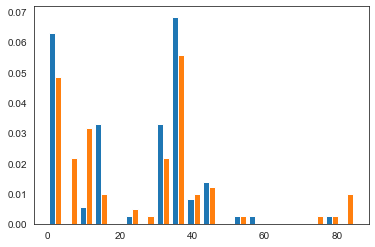

In [180]:
plt.hist([D_num_magnus,D_num_nihal],bins = 20, density = True)
plt.show()

Cool, so this time D# isn't as helpful

### Random forest

In [181]:
forest_clf = RandomForestClassifier(max_depth = 4)
forest_clf.fit(X_D_train,y_D_train)
pred = forest_clf.predict(X_D_test)
sum(pred==y_D_test)/len(y_D_test)

0.5945945945945946

In [183]:
names = []
scores = []
for name, score in zip(X_D_train.columns,forest_clf.feature_importances_):
    names.append(name)
    scores.append(np.round(score,4))
    
score_df = pd.DataFrame({'feature':names,'importance_score':scores})

score_df = score_df.sort_values('importance_score',ascending=False)

In [184]:
score_df.head(20)

feature  importance_score
37          wp_forwardness            0.0509
44                 wb_rank            0.0507
40             wp_storming            0.0448
69              pins_given            0.0348
56                 wcl_MRR            0.0339
49           wb_minor_pref            0.0332
45                 wb_file            0.0288
83      distance_from_king            0.0287
55                  wcl_MR            0.0279
12       wn_b_develop_pref            0.0274
68                 K_moves            0.0267
59                  wcl_BR            0.0261
25            wc_earliness            0.0258
22             wq_mobility            0.0246
67                 Q_moves            0.0227
38  wp_guarded_forwardness            0.0215
64                 N_moves            0.0204
65                 B_moves            0.0201
32              wp_doubled            0.0190
50            wb_rook_pref            0.0167

So again this notes that A# is pretty important

The decision tree liked ['wp_forwardness', 'distance_from_king', 'pins_given', 'K_moves']

All of these were top 10 ish, so yeah they're getting similar features!

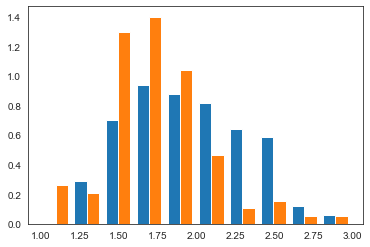

In [185]:
wq_mobility_num_magnus = X_D[y_D == 'Magnus']['wp_forwardness']
wq_mobility_num_nihal = X_D[y_D == 'Nihal']['wp_forwardness']
plt.hist([wq_mobility_num_magnus,wq_mobility_num_nihal], density = True)
plt.show()

And yep, in fact there is a bit of a difference

### Let's try SVC

In [186]:
svc_pipe = Pipeline([('scaler', StandardScaler()),('svc', SVC(kernel = "rbf", C=1))])
svc_pipe.fit(X_D_train,y_D_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [187]:
pred = svc_pipe.predict(X_D_test)
sum(pred == y_D_test)/len(y_D_test)

0.5405405405405406

## Unsupervised stuff

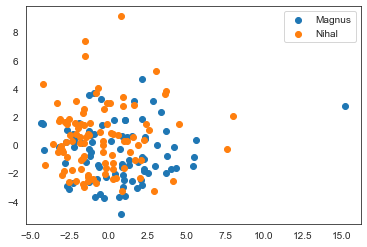

In [192]:
pca_pipe = Pipeline([('scaler',StandardScaler()),('pca',PCA(n_components = 2))])
transform = pca_pipe.fit_transform(X_D)

indices = y_D == 'Magnus'
plt.scatter(transform[indices][:,0],transform[indices][:,1],label='Magnus')
indices = y_D == 'Nihal'
plt.scatter(transform[indices][:,0],transform[indices][:,1],label='Nihal')
plt.legend()
plt.show()

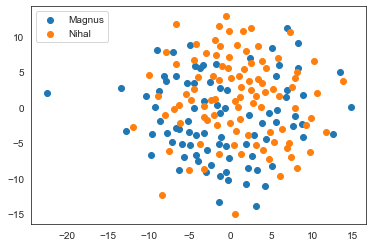

In [193]:
pipe = Pipeline([('scaler',StandardScaler()),('mds',MDS(n_components = 2))])
transform = pipe.fit_transform(X_D)

indices = y_D == 'Magnus'
plt.scatter(transform[indices][:,0],transform[indices][:,1],label='Magnus')
indices = y_D == 'Nihal'
plt.scatter(transform[indices][:,0],transform[indices][:,1],label='Nihal')
plt.legend()
plt.show()

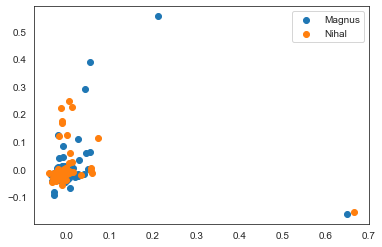

In [194]:
pipe = Pipeline([('scaler',StandardScaler()),
                 ('lle',LocallyLinearEmbedding(n_neighbors=100, n_components=2, method='modified', eigen_solver='dense'))])
transform = pipe.fit_transform(X_D)

indices = y_D == 'Magnus'
plt.scatter(transform[indices][:,0],transform[indices][:,1],label='Magnus')
indices = y_D == 'Nihal'
plt.scatter(transform[indices][:,0],transform[indices][:,1],label='Nihal')
plt.legend()
plt.show()

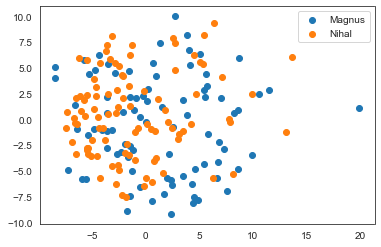

In [195]:
pipe = Pipeline([('scaler',StandardScaler()),
                 ('iso',Isomap(n_neighbors=50, n_components=2))])
transform = pipe.fit_transform(X_D)

indices = y_D == 'Magnus'
plt.scatter(transform[indices][:,0],transform[indices][:,1],label='Magnus')
indices = y_D == 'Nihal'
plt.scatter(transform[indices][:,0],transform[indices][:,1],label='Nihal')
plt.legend()
plt.show()

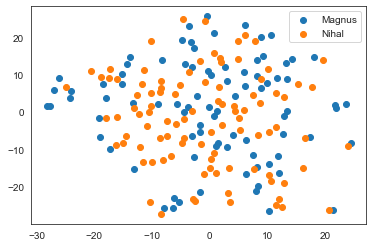

In [196]:
pipe = Pipeline([('scaler',StandardScaler()),
                 ('tsne',TSNE(n_components = 2, perplexity=10))])
transform = pipe.fit_transform(X_D)

indices = y_D == 'Magnus'
plt.scatter(transform[indices][:,0],transform[indices][:,1],label='Magnus')
indices = y_D == 'Nihal'
plt.scatter(transform[indices][:,0],transform[indices][:,1],label='Nihal')
plt.legend()
plt.show()

Like in the last one, it did look like there are some clumps forming in the tSNE...can we build nearest neighbors off of tSNE?

A Google search suggests things like K-nearest neighbors, SVC, and more generally "instance based learning"

Looking back, KNN did okay (57%), and same for random forest (59%)

These are 10%/20% improvements over the naive ~50%

# Stratified KNN

New strat: make 5 KNN classifiers (one for each opening letter, probably drop the A#-E# thing), see how that goes

In [253]:
# Does this custom classification to a dataframe X
def predict(X):
    # Removing the opening info
    X_thin = X.drop(columns = ['A','B','C','D','E','A#','B#','C#','D#','E#'])
    
    pred = [''] * len(X)
    
    for i in range(len(X)):
        # Get the row we're looking at
        row = X.iloc[i]
        
        # Figure out the index of its opening
        for j in range(len(letters)):
            if row[letters[j]] == 1:
                index = j
                break
        
        # Remove the opening info
        row_thin = X_thin.iloc[i]
        
        # Run the classifier
        pred[i] = pipes[index].predict(row_thin.values.reshape(1,-1))[0]
    
    # Return the predictions
    return pred

In [258]:
n_neighbors = 5
letters = ['A','B','C','D','E']

# Create the 5 classifiers
pipes = [Pipeline([('scale',StandardScaler()),('knn',KNeighborsClassifier(n_neighbors = n_neighbors))]) for letter in letters]

# Stratify the training data
# Also making sure to remove info about the opening
X_train_thin = X_train.drop(columns = ['A','B','C','D','E','A#','B#','C#','D#','E#'])
X_train_stratified = [X_train_thin[X_train[letter] == 1] for letter in letters]
y_train_stratified = [y_train[X_train[letter] == 1] for letter in letters]

# Train the 5 classifiers
for i in range(len(letters)):
    pipes[i].fit(X_train_stratified[i],y_train_stratified[i])

# Predict
pred = predict(X_test)
sum(pred==y_test)/len(y_test)

0.7055837563451777

...which isn't better than the basic naive method :(

Say we instead do random forests:

In [261]:
letters = ['A','B','C','D','E']

# Create the 5 classifiers
pipes = [Pipeline([('scale',StandardScaler()),('rf',RandomForestClassifier(max_depth = 3))]) for letter in letters]

# Stratify the training data
# Also making sure to remove info about the opening
X_train_thin = X_train.drop(columns = ['A','B','C','D','E','A#','B#','C#','D#','E#'])
X_train_stratified = [X_train_thin[X_train[letter] == 1] for letter in letters]
y_train_stratified = [y_train[X_train[letter] == 1] for letter in letters]

# Train the 5 classifiers
for i in range(len(letters)):
    pipes[i].fit(X_train_stratified[i],y_train_stratified[i])

# Predict
pred = predict(X_test)
sum(pred==y_test)/len(y_test)

0.6954314720812182

Yeah this isn't great